# Proyecto 9. Análisis de negocios

# Índice
1. [Introducción](#Introducción)
2. [Análisis exploratorio de datos](#Análisis-exploratorio-de-datos)
3. [Análisis inicial de los datos](#Análisis-inicial-de-los-datos)
4. [Visitas](#Visitas)
5. [Número de personas](#Número-de-personas)
6. [Numero de sesiones por día](#Numero-de-sesiones-por-día)
7. [Duración de cada sesión](#Duración-de-cada-sesión)
8. [Frecuencia en que los usuarios regresan](#Frecuencia-en-que-los-usuarios-regresan)
9. [Ventas](#Ventas)
10. [Momento en que la gente empieza a comprar](#Momento-en-que-la-gente-empieza-a-comprar)
11. [Número de pedidos hacen durante un período de tiempo dado](#Número-de-pedidos-hacen-durante-un-período-de-tiempo-dado)
12. [Tamaño promedio de compra](#Tamaño-promedio-de-compra)
13. [LTV por cohorte](#LTV-por-cohorte)
14. [Marketing](#Marketing)
15. [Dinero que se gasto](#Dinero-que-se-gasto)
16. [Costo de adquisición de clientes por fuente (CAC)](#Costo-de-adquisición-de-clientes-por-fuente-(CAC))
17. [Rentabilidad en las inversiones (ROMI)](#Rentabilidad-en-las-inversiones-(ROMI)) 
18. [Conclusión del proyecto](#Conclusión-del-proyecto)

# Introducción

En este proyecto, asumirás un rol en el departamento de analítica de Showz, una empresa dedicada a la venta de entradas para eventos. Tu misión principal será ayudar a optimizar los gastos de marketing de la compañía utilizando datos históricos. Contarás con tres conjuntos de datos clave: registros de visitas al sitio web, información sobre pedidos realizados y estadísticas de los gastos de marketing en diferentes fuentes de adquisición.

A lo largo del proyecto, se busca analizar cómo los usuarios interactúan con la plataforma, cuándo realizan sus primeras compras, el valor que cada cliente aporta a la empresa (LTV) y el punto de equilibrio en el que los ingresos generados cubren el costo de adquisición de los usuarios. Además, realizarás un análisis detallado de las métricas clave, como la frecuencia de visitas, el número de pedidos realizados, la rentabilidad de las campañas publicitarias y la efectividad de las diferentes fuentes de marketing.

El objetivo final es proporcionar recomendaciones basadas en datos que ayuden a los expertos de marketing de Showz a tomar decisiones informadas sobre dónde y cuánto invertir en campañas publicitarias para maximizar el retorno de inversión (ROMI).

# Análisis exploratorio de datos

Se importan las librerías necesarias para poder llevar a cabo esta tarea.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from scipy import stats as st

Creación de data frames a partir de los archivos para poder ser manipulados usando python.

In [2]:
gastos=pd.read_csv(r"/datasets/costs_us.csv")
ordenes=pd.read_csv(r"/datasets/orders_log_us.csv")
visitas=pd.read_csv(r"/datasets/visits_log_us.csv")

Infomación básica de los dataframes usando .info(), .describe() y .head()

In [3]:
print("Dataframe gastos")
gastos.info()
print("\n")
print(gastos.describe())
print("\n")
print(gastos.head())

Dataframe gastos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [4]:
print("Dataframe ordenes")
ordenes.info()
print("\n")
print(ordenes.describe())
print("\n")
print(ordenes.head())

Dataframe ordenes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605

In [5]:
print("Dataframe visitas")
visitas.info()
print("\n")
print(visitas.describe())
print("\n")
print(visitas.head())

Dataframe visitas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch

## Valores nulos

In [6]:
print("Data frame gastos\n")
print(gastos.isnull().sum())
print("\nData frame ordenes\n")
print(ordenes.isnull().sum())
print("\nData frame visitas\n")
print(visitas.isnull().sum())

Data frame gastos

source_id    0
dt           0
costs        0
dtype: int64

Data frame ordenes

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Data frame visitas

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


Observaciones: Se puede comprobar que en los data frames no se tienen valores nulos, por lo que no es necesario realizar ninguna acción referente a ellos.

## Valores duplicados

In [7]:
print("Data frame gastos\n")
print(gastos.duplicated().sum())
print("\nData frame ordenes\n")
print(ordenes.duplicated().sum())
print("\nData frame visitas\n")
print(visitas.duplicated().sum())

Data frame gastos

0

Data frame ordenes

0

Data frame visitas

0


Observaciones: De la misma manera que los valores ausentes no se presentan valores duplicados en los data frames.

## Transformando columanas de fecha a tipo datetime

In [8]:
gastos["dt"]=pd.to_datetime(gastos['dt'])
ordenes["Buy Ts"]=pd.to_datetime(ordenes['Buy Ts'], format="%Y-%m-%d %H:%M:%S")
visitas["Start Ts"]=pd.to_datetime(visitas['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visitas["End Ts"]=pd.to_datetime(visitas['End Ts'], format="%Y-%m-%d %H:%M:%S")

In [9]:
def info(DF):
    return (DF.info())

info(gastos)
info(ordenes)
info(visitas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     ------------

Los valores correspondientes a fechas han cambiado de tipo de dato correctamente.

# Visitas

# Número de personas

Se obtendrá el número de personas lo usan cada día, semana y mes.
Primero se tiene que agregar columnas adicionales que hagan referencia a las fechas pero especificándolas dentro de un grupo en concreto como año, mes o semana. 

In [10]:
visitas['session_year']  = visitas['Start Ts'].dt.isocalendar().year
visitas['session_month'] = visitas['Start Ts'].dt.month
visitas['session_week']  = visitas['Start Ts'].dt.isocalendar().week
visitas['session_date'] = visitas['Start Ts'].dt.date

Con ello se obtendrá el promedio de las personas que usan la plataforma según el tiempo.

In [11]:
dau_total = visitas.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visitas.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visitas.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()

In [12]:
print("Número promedio de usuarios por día:",dau_total.iloc[0])
print("Número promedio de usuarios por semana:",wau_total.iloc[0])
print("Número promedio de usuarios por mes:", mau_total.iloc[0])

Número promedio de usuarios por día: 907.9917582417582
Número promedio de usuarios por semana: 5716.245283018868
Número promedio de usuarios por mes: 23228.416666666668


 # Numero de sesiones por día

In [13]:
sesiones_por_dia = visitas.groupby("session_date").agg({'Uid': ['count', 'nunique']})
sesiones_por_dia.columns=["n_session","n_user"]
sesiones_por_dia["session_per_user"]=sesiones_por_dia["n_session"]/sesiones_por_dia["n_user"]
print("Número de sesiones promedio por día:",sesiones_por_dia['n_session'].mean())

Número de sesiones promedio por día: 987.3626373626373


# Duración de cada sesión

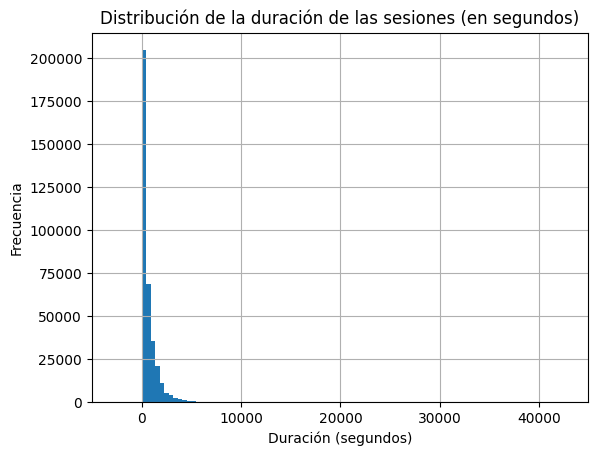

Duración promedio por sessión es de 60.00000000000001 segundos


In [14]:
visitas['session_duration_sec'] = (visitas['End Ts'] - visitas['Start Ts']).dt.total_seconds()

visitas['session_duration_sec'].hist(bins=100)
plt.title("Distribución de la duración de las sesiones (en segundos)")
plt.xlabel("Duración (segundos)")
plt.ylabel("Frecuencia")
plt.show()

asl=visitas["session_duration_sec"].mode()[0]
print(f"Duración promedio por sessión es de {asl} segundos")


# Frecuencia en que los usuarios regresan

In [15]:
#Se busca la primera vez que usuario realizó una compra
First_Buy_Ts=ordenes.groupby("Uid")["Buy Ts"].min()
First_Buy_Ts.name = 'First_Buy_Ts'

#Se une la información obtenida con la información general
ordenes=ordenes.join(First_Buy_Ts, on="Uid")
ordenes['purchase_month'] = ordenes['Buy Ts'].dt.to_period('M')
ordenes['cohort_month'] = ordenes['First_Buy_Ts'].dt.to_period('M')

#Se obtiene el ciclo de vida del cohorte para tener referencia y se agrupa para obtener usuarios unicos en cada caso
ordenes['cohort_lifetime'] = (ordenes['purchase_month'].dt.year - ordenes['cohort_month'].dt.year) * 12 + (ordenes['purchase_month'].dt.month - ordenes['cohort_month'].dt.month)
cohorte = ordenes.groupby(['cohort_month', 'cohort_lifetime'])['Uid'].nunique().reset_index()

#Se filtra para obtener únicamente los usuarios iniciales en cada cohorte y se nombra esa coumna con nuevo nombre
initial_users_count = cohorte[cohorte['cohort_lifetime'] == 0][['cohort_month', 'Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid': 'cohort_users'})

#Unión entre la información general y los usuarios únicos en el incio de cada cohorte
cohorte = cohorte.merge(initial_users_count,on='cohort_month')

#Obtención de la tase de retención
cohorte['retention'] = cohorte['Uid']/cohorte['cohort_users']

print(cohorte)

   cohort_month  cohort_lifetime   Uid  cohort_users  retention
0       2017-06                0  2023          2023   1.000000
1       2017-06                1    61          2023   0.030153
2       2017-06                2    50          2023   0.024716
3       2017-06                3    54          2023   0.026693
4       2017-06                4    88          2023   0.043500
..          ...              ...   ...           ...        ...
74      2018-03                2    58          3533   0.016417
75      2018-04                0  2276          2276   1.000000
76      2018-04                1    69          2276   0.030316
77      2018-05                0  2988          2988   1.000000
78      2018-06                0     1             1   1.000000

[79 rows x 5 columns]


Para poder observar de una manera más limpia los datos se eleabora una tabla pivote.

In [16]:
retention_pivot = cohorte.pivot_table(
    index='cohort_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
print(retention_pivot.fillna(""))

cohort_lifetime   0         1         2         3         4         5   \
cohort_month                                                             
2017-06          1.0  0.030153  0.024716  0.026693    0.0435  0.033119   
2017-07          1.0  0.027041  0.029641  0.033281  0.025481  0.019761   
2017-08          1.0  0.042336  0.038686  0.032117  0.029197  0.023358   
2017-09          1.0  0.050368  0.038745  0.028671  0.020147  0.024797   
2017-10          1.0  0.047465  0.028341  0.021198  0.021429   0.01659   
2017-11          1.0  0.054398  0.029405  0.025974  0.019848  0.011762   
2017-12          1.0  0.033311    0.0235  0.022131  0.011408  0.014374   
2018-01          1.0  0.033798  0.024607  0.012748  0.013341             
2018-02          1.0   0.03232  0.015886  0.010682                       
2018-03          1.0  0.025474  0.016417                                 
2018-04          1.0  0.030316                                           
2018-05          1.0                  

Mapa de calor para ver como los cambios se manifiestan.

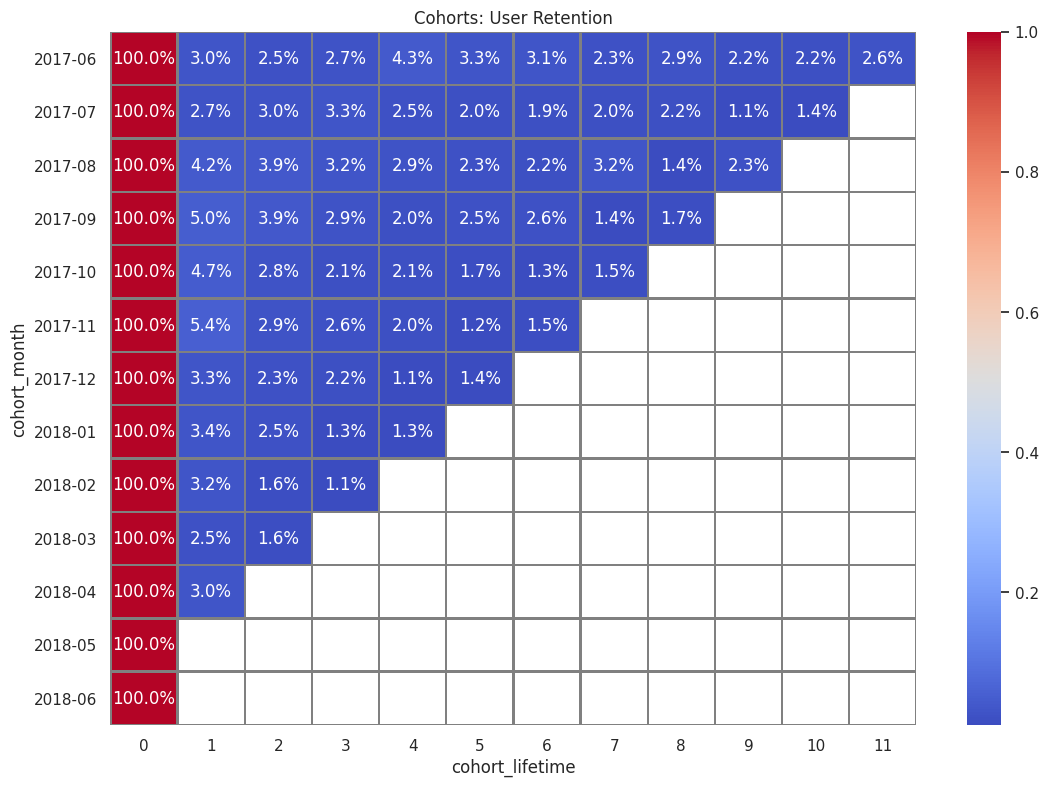

In [17]:
sns.set_theme(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(
    retention_pivot, annot=True, fmt='.1%', linewidths=1, cmap='coolwarm', linecolor='gray')
plt.show()


Observación: las tasas de retención disminuyen rápidamente después de la primera compra, lo que sugiere que una gran parte de los clientes no vuelve a comprar después de un corto período de tiempo, esto lo podemos tomar normal dado que se esta buscando vender entradas de eventos y considerar que un mismo usuario mensualmente tendrá interés en ir a eventos lo que no es realista, variabilidad en las tasas de retención entre cohortes puede ser el resultado de factores como la temporada, el tipo de entradas, las campañas de marketing o la satisfacción del cliente.   

# Ventas

# Momento en que la gente empieza a comprar

Usando el primer registro de inicio de sesión como primer visita y la primera vez que usuario realizó una compra.

In [18]:
#Primer inicio de sesión
first_visit = visitas.groupby('Uid')['Start Ts'].min().reset_index()
first_visit.rename(columns={'Start Ts': 'first_visit_date'}, inplace=True)
#Primera compra
First_Buy_Ts_1=First_Buy_Ts.reset_index()
First_Buy_Ts_1.rename(columns={'Buy Ts': 'first_purchase_date'}, inplace=True)

#Se une la información en un mismo data frame
conversion=pd.merge(first_visit,First_Buy_Ts_1,on="Uid")
conversion['conversion_time_days'] = (conversion['First_Buy_Ts'] - conversion['first_visit_date']).dt.days

Para esta parte se obtendrá la tasa de conversión

In [19]:
#Cohortes de 10 días
conversion['conversion_30_days'] = (conversion['conversion_time_days'] // 30)
#Cohortes de 30 días
conversion['conversion_60_days'] = (conversion['conversion_time_days'] // 60)
#Cohortes de 60 días
conversion['conversion_90_days'] = (conversion['conversion_time_days'] // 90)
print(conversion.head())

                Uid    first_visit_date        First_Buy_Ts  \
0   313578113262317 2017-09-18 22:49:00 2018-01-03 21:51:00   
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00   
2  2429014661409475 2017-10-11 17:14:00 2017-10-11 18:33:00   
3  2464366381792757 2018-01-27 20:10:00 2018-01-28 15:54:00   
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00   

   conversion_time_days  conversion_30_days  conversion_60_days  \
0                   106                   3                   1   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   

   conversion_90_days  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  


Se obtiene el número de usuarios únicos para poder obtener la tasa de conversión según el cohorte.

In [20]:
#Número total de usuarios
total_usuarios = conversion['Uid'].nunique()

#Obtención de cuántos usuarios hay en cada cohorte de cada división de meses
cohorte_conversiones_30d = conversion.groupby('conversion_30_days').size()
cohorte_conversiones_60d = conversion.groupby('conversion_60_days').size()
cohorte_conversiones_90d = conversion.groupby('conversion_90_days').size()

#Obtención de cada tasa de conversión
tasa_conversion_30d = cohorte_conversiones_30d / total_usuarios * 100
tasa_conversion_60d = cohorte_conversiones_60d / total_usuarios * 100
tasa_conversion_90d = cohorte_conversiones_90d / total_usuarios * 100

print("Tasa de conversión por cohorte (30 días):")
print(tasa_conversion_30d)
print("Tasa de conversión por cohorte (60 días):")
print(tasa_conversion_60d)
print("Tasa de conversión por cohorte (90 días):")
print(tasa_conversion_90d)

Tasa de conversión por cohorte (30 días):
conversion_30_days
0     86.408564
1      3.786655
2      2.513485
3      2.037073
4      1.560660
5      1.264956
6      0.848780
7      0.616050
8      0.427128
9      0.273800
10     0.139638
11     0.117734
12     0.005476
dtype: float64
Tasa de conversión por cohorte (60 días):
conversion_60_days
0    90.195219
1     4.550557
2     2.825617
3     1.464830
4     0.700928
5     0.257372
6     0.005476
dtype: float64
Tasa de conversión por cohorte (90 días):
conversion_90_days
0    92.708704
1     4.862689
2     1.891958
3     0.531172
4     0.005476
dtype: float64


Para poder obtener una visión más amigable de los datos se gráficarán. 

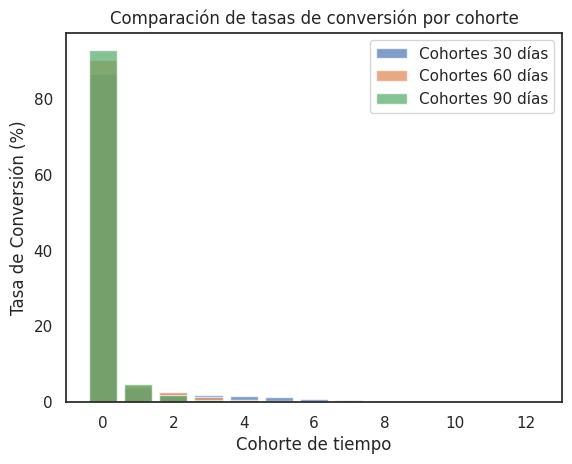

In [21]:
#Todas las gráficas juntas
plt.bar(tasa_conversion_30d.index, tasa_conversion_30d.values, label="Cohortes 30 días", alpha=0.7)
plt.bar(tasa_conversion_60d.index, tasa_conversion_60d.values, label="Cohortes 60 días", alpha=0.7)
plt.bar(tasa_conversion_90d.index, tasa_conversion_90d.values, label="Cohortes 90 días", alpha=0.7)

plt.xlabel('Cohorte de tiempo')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Comparación de tasas de conversión por cohorte')
plt.legend()
plt.show()

Obteniendo las gráficas individuales tenemos.

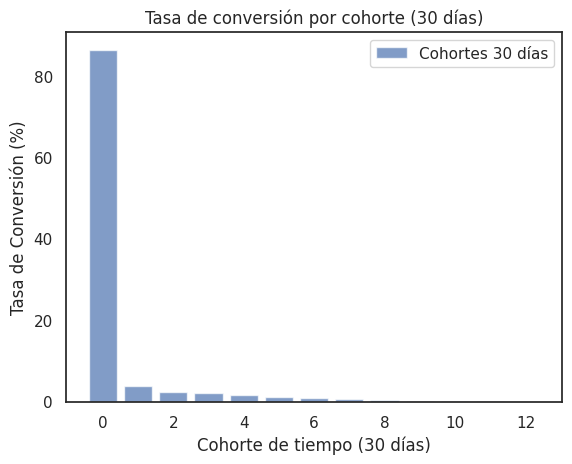

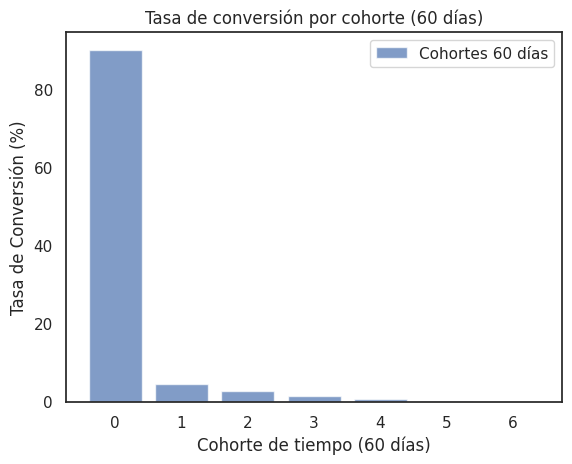

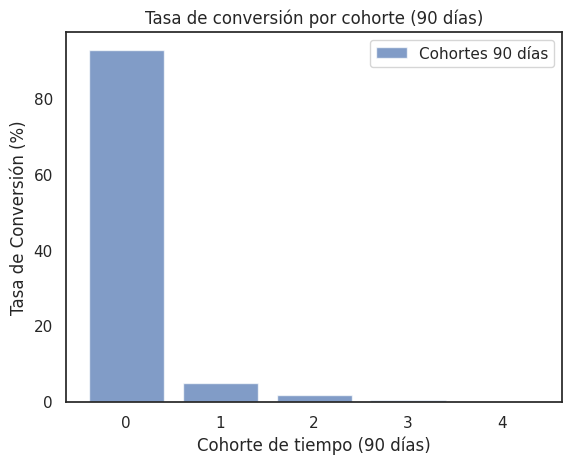

In [22]:
# Gráfico 1: Tasa de conversión por cohorte de 10 días
plt.figure()
plt.bar(tasa_conversion_30d.index, tasa_conversion_30d.values, label="Cohortes 30 días", alpha=0.7)
plt.xlabel('Cohorte de tiempo (30 días)')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de conversión por cohorte (30 días)')
plt.legend()
plt.show()

# Gráfico 2: Tasa de conversión por cohorte de 30 días
plt.figure()
plt.bar(tasa_conversion_60d.index, tasa_conversion_60d.values, label="Cohortes 60 días", alpha=0.7)
plt.xlabel('Cohorte de tiempo (60 días)')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de conversión por cohorte (60 días)')
plt.legend()
plt.show()

# Gráfico 3: Tasa de conversión por cohorte de 60 días
plt.figure()
plt.bar(tasa_conversion_90d.index, tasa_conversion_90d.values, label="Cohortes 90 días", alpha=0.7)
plt.xlabel('Cohorte de tiempo (90 días)')
plt.ylabel('Tasa de Conversión (%)')
plt.title('Tasa de conversión por cohorte (90 días)')
plt.legend()
plt.show()

Se puede observar que un gran porcentaje de usuarios al momento de iniciar por primera vez una sesión se convierten en clientes que compran al mismo tiempo, sea el cohorte que sea el principio es el mismo.

# Número de pedidos hacen durante un período de tiempo dado

Dado la cantidad de datos que se tienen y el tiempo en que estos están presentes se buscará el número de pedidos mensuales.

In [23]:
#Pedidos mensuales
pedidos_por_mes = ordenes.groupby(ordenes['Buy Ts'].dt.to_period('M')).size().reset_index(name="Pedidos")
print(pedidos_por_mes)
print("El promedio de pedidos en un mes es:", pedidos_por_mes["Pedidos"].mean())

     Buy Ts  Pedidos
0   2017-06     2354
1   2017-07     2363
2   2017-08     1807
3   2017-09     3387
4   2017-10     5679
5   2017-11     5659
6   2017-12     6218
7   2018-01     4721
8   2018-02     5281
9   2018-03     5326
10  2018-04     3273
11  2018-05     4346
12  2018-06        1
El promedio de pedidos en un mes es: 3878.076923076923


# Tamaño promedio de compra

In [24]:
#Por cada mes
tamaño_promedio_por_mes = ordenes.groupby(ordenes['Buy Ts'].dt.to_period("M"))['Revenue'].mean()
print(tamaño_promedio_por_mes)
print("\n")

#Promedio mensual total
tamaño_promedio_compra = ordenes['Revenue'].mean()
print(f"Tamaño promedio de compra: {tamaño_promedio_compra}")

Buy Ts
2017-06    4.060106
2017-07    5.306589
2017-08    4.847139
2017-09    5.416448
2017-10    4.928280
2017-11    4.783518
2017-12    5.852139
2018-01    4.112927
2018-02    4.840095
2018-03    5.413930
2018-04    5.150645
2018-05    4.771279
2018-06    3.420000
Freq: M, Name: Revenue, dtype: float64


Tamaño promedio de compra: 4.999646930477041


# LTV por cohorte

Obteniendo un grupo de cohorte mensual en el data frame gastos y el mes de compra en el data frame ordenes para poder obteneter el LTV

In [25]:
gastos['cohort_month'] = gastos['dt'].dt.to_period('M')
ordenes['purchase_month'] = ordenes['Buy Ts'].dt.to_period('M')

#Agrupando por cohorte el número de ususarios únicos
cohort_sizes = ordenes.groupby('cohort_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['cohort_month', 'n_buyers']
print(cohort_sizes.head())

#Obteniendo el ingresos por cada cohorte y mes de compra
cohorts = ordenes.groupby(['cohort_month','purchase_month']).agg({'Revenue': 'sum'}).reset_index()
print(cohorts.head())

#Unión de la información obtenida previamente, es decir, el reporte.
report=pd.merge(cohort_sizes, cohorts, on='cohort_month')
print(report)

  cohort_month  n_buyers
0      2017-06      2023
1      2017-07      1923
2      2017-08      1370
3      2017-09      2581
4      2017-10      4340
  cohort_month purchase_month  Revenue
0      2017-06        2017-06  9557.49
1      2017-06        2017-07   981.82
2      2017-06        2017-08   885.34
3      2017-06        2017-09  1931.30
4      2017-06        2017-10  2068.58
   cohort_month  n_buyers purchase_month   Revenue
0       2017-06      2023        2017-06   9557.49
1       2017-06      2023        2017-07    981.82
2       2017-06      2023        2017-08    885.34
3       2017-06      2023        2017-09   1931.30
4       2017-06      2023        2017-10   2068.58
..          ...       ...            ...       ...
74      2018-03      3533        2018-05   1114.87
75      2018-04      2276        2018-04  10600.69
76      2018-04      2276        2018-05   1209.92
77      2018-05      2988        2018-05  13925.76
78      2018-06         1        2018-06      3.42

[79

In [26]:
#Obteniendo un reporte dividiendo el ingreso entre el número de compradores 
report['LTV'] = report['Revenue'] / report['n_buyers']

#Se agrega  el ciclo de vida de los cohortes
report['age'] = (report['purchase_month'].dt.year - report['cohort_month'].dt.year) * 12 + (report['purchase_month'].dt.month - report['cohort_month'].dt.month)

#Información se plasma en una tabla pivote
output = report.pivot_table(
    index='cohort_month', 
    columns='age', 
    values='LTV', 
    aggfunc='mean')

print(output.fillna(''))

age                 0         1         2         3         4         5   \
cohort_month                                                               
2017-06       4.724414  0.485329  0.437637  0.954671  1.022531  0.735502   
2017-07       6.010218  0.335211  0.623531  0.358976  0.176791  0.156048   
2017-08       5.276518  0.471993  0.458482  0.391277  0.494051   0.28354   
2017-09       5.644529  1.117586   0.52093  3.975792  0.400558  0.647067   
2017-10       5.003733  0.535763  0.191394  0.157145   0.15156  0.120362   
2017-11       5.154683  0.399233  0.199556  0.324952  0.148013  0.053879   
2017-12       4.738191  0.260374  0.925097  1.065275   0.31293  0.338047   
2018-01       4.135636  0.294758  0.304281  0.142778  0.062698             
2018-02       4.156987  0.278274  0.078515  0.074144                       
2018-03       4.838803  0.300892  0.315559                                 
2018-04       4.657597  0.531599                                           
2018-05     

Observaciones: Encontramos el LTV correspondiente a cada cohorte en un ciclo de vida de usuario de 12 meses contando el primer mes, las fluctuaciones en el LTV en meses específicos pueden estar relacionadas con factores estacionales, campañas de marketing, cambios en la estrategia del negocio o eventos especiales que puedan haber influido en el comportamiento de los usuarios.

Creando un mapa de calor para para observar el LTV del ciclo de 12 meses de vida.

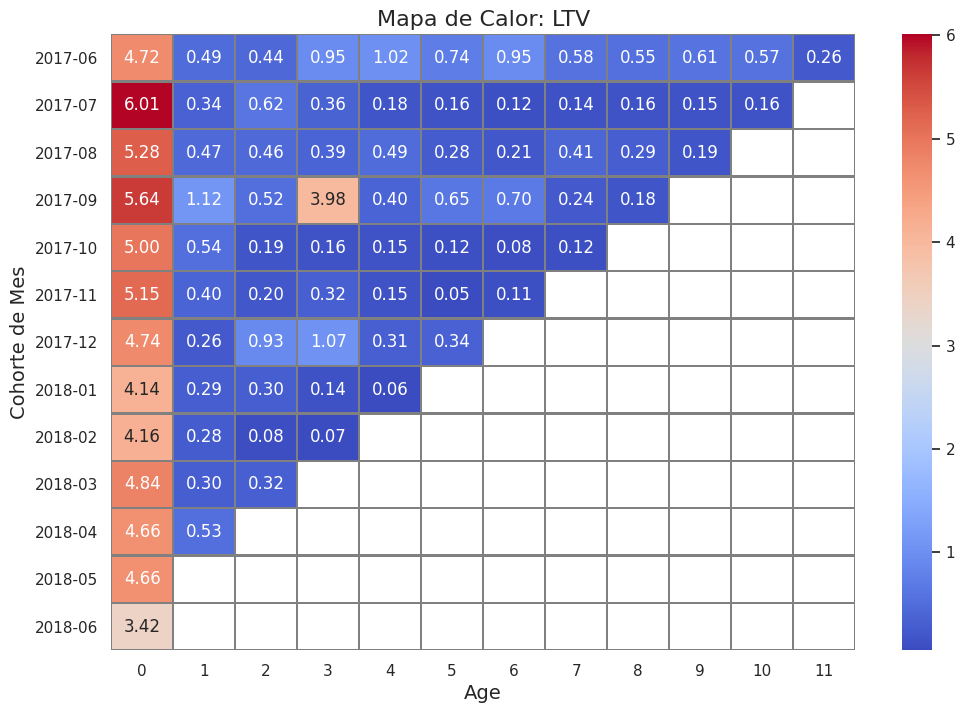

In [28]:
#Creando mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(output, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, linecolor='gray')
plt.title('Mapa de Calor: LTV', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cohorte de Mes', fontsize=14)
plt.show()

Observación: A medida que pasa el tiempo desde la adquisición de los clientes, hay una tendencia general a la disminución en el valor generado por cada cliente, el LTV disminuye de manera constante lo que es un indicativo de que los clientes están comprando menos con el paso de los meses, cabe resaltar que algunas cohortes muestran picos inusuales en ciertos meses, lo que podría indicar un comportamiento atípico.

# Marketing

# Dinero que se gasto

Se obtendrá el dinero que se gastó en total, por fuente de adquisición y a lo largo del tiempo. 

In [ ]:
# Gastos totales
total_cost = gastos['costs'].sum()
print(f"Total dinero gastado: {total_cost}")
print("\n")

# Dinero gastado por fuente de adquisición
costs_by_source = gastos.groupby('source_id')['costs'].sum().reset_index()
print("Dinero gastado por fuente de adquisición:")
print(costs_by_source)
print("\n")

# Dinero gastado a lo largo del tiempo (por fecha)
costs_by_date = gastos.groupby('cohort_month')['costs'].sum().reset_index()
print("Dinero gastado a lo largo del tiempo:")
print(costs_by_date)

# Costo de adquisición de clientes por fuente (CAC)

In [ ]:
# Agruopando gastos por fuente de adquisición
gastos_por_fuente = gastos.groupby('source_id')['costs'].sum().reset_index()

# Une la información de dataframe ordenes y visitas
ordenes_con_fuente = pd.merge(ordenes, visitas[['Uid', 'Source Id']], on='Uid', how='left')

# Número de clientes únicos por fuente
clientes_por_fuente = ordenes_con_fuente.groupby('Source Id')['Uid'].nunique().reset_index()
clientes_por_fuente.columns = ['source_id', 'clientes_adquiridos']

# Uniendo información
cac_por_fuente = pd.merge(gastos_por_fuente, clientes_por_fuente, on='source_id')

# Obteniendo CAC
cac_por_fuente['CAC'] = cac_por_fuente['costs'] / cac_por_fuente['clientes_adquiridos']
print(cac_por_fuente.head())

# Rentabilidad en las inversiones (ROMI)

In [ ]:
# Repitiendo para evitar errores se obtiene ordenes con el id de la fuente
ordenes_con_fuente = pd.merge(ordenes, visitas[['Uid', 'Source Id']], on='Uid', how='left')

# Agrupación de los gastos por fuente y cohorte
gastos_por_fuente = gastos.groupby(['cohort_month', 'source_id'])['costs'].sum().reset_index()

# Clientes adquiridos por fuente y cohorte 
clientes_por_fuente = ordenes_con_fuente.groupby(['cohort_month', 'Source Id'])['Uid'].nunique().reset_index()

# Unir clientes adquiridos, gastos por fuente y cohorte
romi_data_fuente = pd.merge(clientes_por_fuente, gastos_por_fuente, left_on=['cohort_month', 'Source Id'], right_on=['cohort_month', 'source_id'])

# Unir infoimación para tener el LTV por cohorte
romi_data_fuente = pd.merge(romi_data_fuente, report[['cohort_month', 'LTV']], on='cohort_month')

# CAC por fuente
romi_data_fuente['CAC'] = romi_data_fuente['costs'] / romi_data_fuente['Uid']

# ROMI
romi_data_fuente['ROMI'] = romi_data_fuente['LTV'] / romi_data_fuente['CAC']

# Mostrar el resultado con ROMI por fuente
print(romi_data_fuente[['cohort_month', 'Source Id', 'ROMI']])

Agregando tabal pivote para observer los datos.

In [ ]:
output = romi_data_fuente.pivot_table(
    index='Source Id', 
    columns='cohort_month', 
    values='ROMI', 
    aggfunc='mean')

print(output.cumsum(axis=1).round(2).fillna(""))

In [ ]:
#Creando mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(output.cumsum(axis=1), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, linecolor='gray')
plt.title('Mapa de Calor: ROMI Acumulado por Fuente de Anuncios', fontsize=16)
plt.xlabel('Fuente de Anuncios', fontsize=14)
plt.ylabel('Cohorte de Mes', fontsize=14)
plt.show()

Observación: Fuente 9, Fuente 1, y Fuente 10 son las más rentables debido a su ROMI alto y crecimiento constante. Estas fuentes deberían recibir una mayor inversión y atención en futuras campañas publicitarias, ya que han demostrado ser altamente efectivas. 

Fuente 2, Fuente 3, Fuente 4, y Fuente 5 muestran un ROMI relativamente bajo en comparación con las anteriores. Aunque siguen mostrando un crecimiento, es importante investigar por qué estas fuentes no generan el mismo nivel de retorno y si hay formas de optimizar su rendimiento (como mejorar la segmentación, ajustar las estrategias de marketing o reducir los costos de adquisición)

Obteniendo ROMI por cohortes mensuales

In [ ]:
monthly_costs = gastos.groupby('cohort_month')["costs"].sum().reset_index()

report_ = pd.merge(report, monthly_costs, on='cohort_month')
report_['cac'] = report_['costs'] / report_['n_buyers']
print(report_)

In [ ]:
#Tabla pivote
report_['romi'] = report_['LTV'] / report_['cac']
output1 = report_.pivot_table(
    index='cohort_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

print(output1.cumsum(axis=1).round(2).fillna(""))

In [ ]:
#Creando mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(output1.cumsum(axis=1), annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, linecolor='gray')
plt.title('Mapa de Calor: ROMI Acumulado por cohorte mensual', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Cohorte de Mes', fontsize=14)
plt.show()

Observaciones: En las cohortes más antiguas, a medida que se avanza en los meses del ciclo de vida (meses 10, 11, 12), el ROMI tiende a estabilizarse. Esto puede reflejar que después de un tiempo determinado, el retorno sobre la inversión no crece de manera exponencial, sino que se estabiliza a medida que los clientes se convierten en clientes leales o repetitivos, o que las campañas publicitarias ya han alcanzado su potencial máximo.

las cohortes más jóvenes (como 2017-07, 2017-08, etc.) pueden mostrar más variabilidad debido a los ingresos menores generados en los primeros meses de vida de los clientes. Esto refleja el comportamiento natural de las cohortes en sus etapas iniciales. Un descenso en el ROMI de cohortes recientes podría indicar problemas con la adquisición de clientes o que las campañas no están siendo tan efectivas en los meses más recientes.

Se puede decir que las cohortes más antiguas tienen un ROMI acumulado mucho mayor que las cohortes más recientes, lo que sugiere que los clientes adquiridos en los primeros meses son más valiosos, ejemplo de ello la cohorte de 2017-06 que parece tener un ROMI más alto en las primeras edades, lo que indica que esta cohorte fue muy rentable desde el principio.

# Conclusión del proyecto

El análisis conjunto de LTV, CAC y ROMI proporciona a las empresas una visión integral sobre la rentabilidad de sus estrategias de marketing y adquisición de clientes. Estas métricas, cuando se gestionan adecuadamente, permiten a las empresas maximizar el valor de sus clientes, optimizar sus costos de adquisición y asegurarse de que cada inversión en marketing sea rentable. En última instancia, un enfoque equilibrado entre estas métricas es la clave para lograr un crecimiento sostenible y rentable, asegurando que la empresa no solo adquiera nuevos clientes, sino que también fomente relaciones a largo plazo que generen valor continuo.